# Exploratory Data Analysis (EDA) on Retail Sales Data

### Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings 
from warnings import filterwarnings
filterwarnings(action='ignore') 

# 1. Data Loading and Cleaning

### Menu Data Set

In [2]:
menu_df = pd.read_csv("menu.csv")

In [3]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [4]:
menu_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
menu_df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [6]:
menu_df.duplicated().sum()


0

In [7]:
menu_df.isnull().sum().sum()

0

In [8]:
menu_df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [9]:
menu_df.dropna(inplace= True)

### Sales Data Set

In [10]:
sales_df = pd.read_csv("Supermart Sales Dataset.csv")

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [12]:
sales_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [13]:
sales_df.duplicated().sum()

0

In [14]:
sales_df.isnull().sum().sum()

0

In [15]:
sales_df.dropna(inplace = True)

In [16]:
sales_df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [17]:
sales_df["Order ID"].duplicated().sum()

0

# 2. Descriptive Statistics: 
Calculate basic statistics (mean, median, mode, standard deviation).

In [18]:
# Mean: Average value
mean_sales = sales_df['Sales'].mean()
print(f"Mean Sales: {mean_sales:.2f}")

# Median: Middle value
median_sales = sales_df['Sales'].median()
print(f"Median Sales: {median_sales:.2f}")

# Mode: Most frequent value
mode_sales = sales_df['Sales'].mode()[0]  # Take the first mode in case of multiple
print(f"Mode Sales: {mode_sales:.2f}")

# Standard Deviation: Spread of data
std_sales = sales_df['Sales'].std()
print(f"Standard Deviation of Sales: {std_sales:.2f}")


Mean Sales: 1496.60
Median Sales: 1498.00
Mode Sales: 1259.00
Standard Deviation of Sales: 577.56


In [19]:
# Descriptive statistics for all numerical columns
print(sales_df.describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


# 3. Time Series Analysis: 
Analyze sales trends over time using time series techniques.

#### a) Prepare Data 

In [20]:
# Convert 'Order Date' to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m-%d-%Y', errors='coerce')

# Check for invalid dates
print(sales_df['Order Date'].isna().sum())  


5952


In [21]:
# Display rows with invalid dates in 'Order Date'
invalid_dates = sales_df[sales_df['Order Date'].isna()]
print(invalid_dates)


     Order ID Customer Name           Category       Sub Category  \
12       OD13        Sharon             Snacks            Cookies   
14       OD15        Sundar  Eggs, Meat & Fish            Chicken   
15       OD16        Ramesh       Oil & Masala  Edible Oil & Ghee   
17       OD18        Arutra          Beverages      Health Drinks   
18       OD19       Haseena  Eggs, Meat & Fish             Mutton   
...       ...           ...                ...                ...   
9985   OD9986         Shree  Eggs, Meat & Fish             Mutton   
9987   OD9988        Ganesh   Fruits & Veggies   Fresh Vegetables   
9989   OD9990        Sudeep  Eggs, Meat & Fish               Eggs   
9992   OD9993          Peer       Oil & Masala             Spices   
9993   OD9994        Ganesh        Food Grains       Atta & Flour   

             City Order Date   Region  Sales  Discount  Profit       State  
12       Dindigul        NaT    South   1659      0.19  315.21  Tamil Nadu  
14    Kanyakumari

In [22]:
# Drop rows with invalid dates in 'Order Date'
sales_df = sales_df[sales_df['Order Date'].notna()]


In [23]:
# Convert 'Order Date' column to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

# Create a new column 'Year-Month' for easier analysis of time periods
sales_df['Year-Month'] = sales_df['Order Date'].dt.to_period('M')


#### b) Aggregate Sales by Month

In [24]:
# Group the data by 'Year-Month' and calculate the total sales for each month
monthly_sales = sales_df.groupby('Year-Month')['Sales'].sum().reset_index()

# Print the first few rows to check the result
print(monthly_sales.head())


  Year-Month   Sales
0    2015-01   30730
1    2015-02   38759
2    2015-03   79758
3    2015-04  110584
4    2015-05   66499


### c) Visualize Sales Over Time

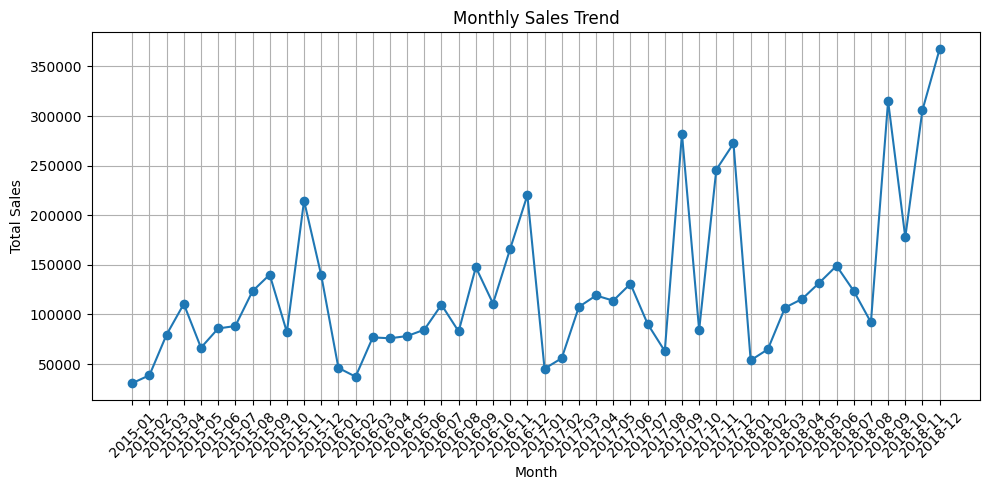

In [25]:
# Plot the total sales over time (monthly)
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### d) Look for Seasonal Trends 

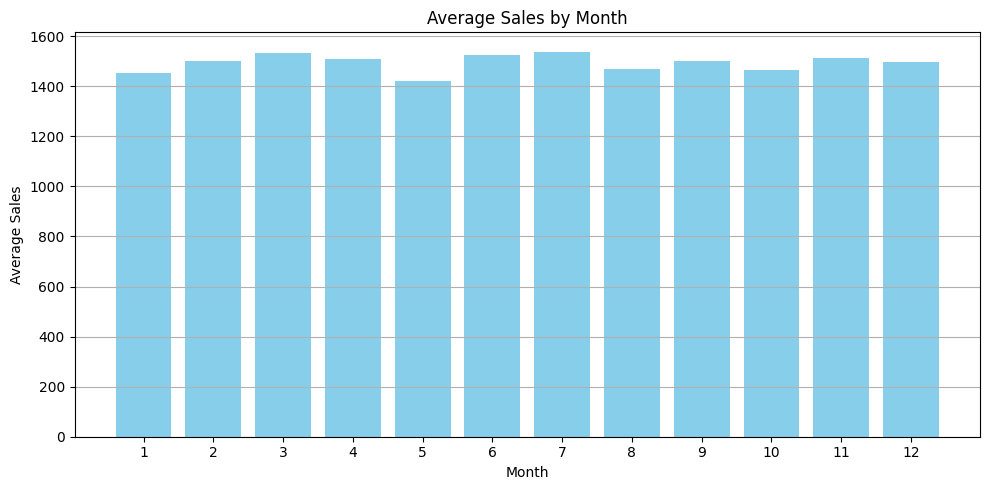

In [26]:
# Group by month and calculate the average sales for each month
monthly_avg_sales = sales_df.groupby(sales_df['Order Date'].dt.month)['Sales'].mean().reset_index()

# Plot the average sales by month
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg_sales['Order Date'], monthly_avg_sales['Sales'], color='skyblue')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))  # Ensure we show all months
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# 4. Customer and Product Analysis:
Analyze customer demographics and purchasing behavior.

### a) Top Customers by Sales

In [27]:
# Group by customer and calculate total sales for each customer
top_customers = sales_df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort customers by total sales in descending order
top_customers = top_customers.sort_values(by='Sales', ascending=False).head(10)

# Print the top 10 customers
print("Top 10 Customers by Sales:")
print(top_customers)


Top 10 Customers by Sales:
   Customer Name   Sales
4         Amrish  157400
42         Verma  156248
0         Adavan  148837
14       Hussain  147228
40         Surya  142099
7         Arutra  141448
32          Shah  138827
36        Sudeep  136704
17         Jonas  133593
18         Komal  133173


### b) Visualize Top Customers

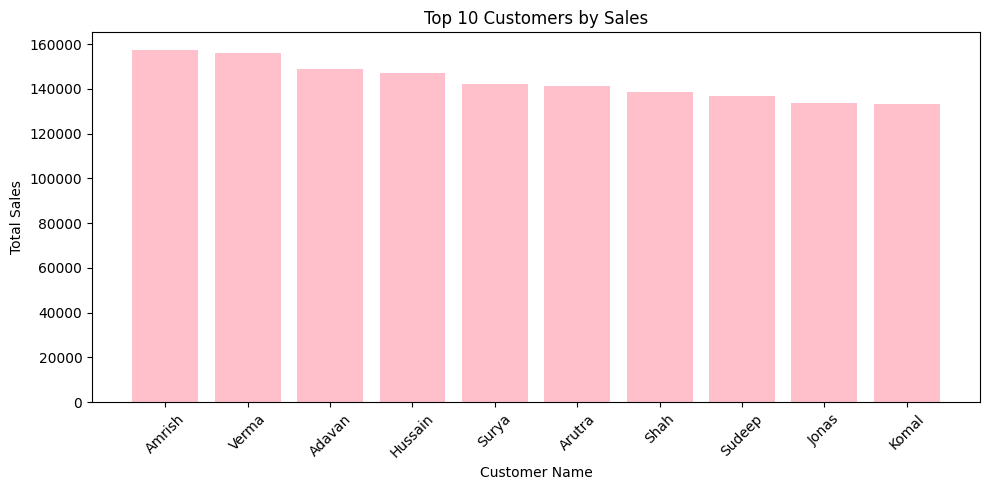

In [28]:
# Plot the top 10 customers
plt.figure(figsize=(10, 5))
plt.bar(top_customers['Customer Name'], top_customers['Sales'], color='pink')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### c) Top Products by Sales

In [29]:
# Group by product and calculate total sales for each product
top_products = sales_df.groupby('Category')['Sales'].sum().reset_index()

# Sort products by total sales in descending order
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)

# Print the top 10 products
print("Top 10 Products by Sales:")
print(top_products)


Top 10 Products by Sales:
            Category   Sales
2  Eggs, Meat & Fish  948304
6             Snacks  910849
4   Fruits & Veggies  877861
0             Bakery  869538
3        Food Grains  833326
5       Oil & Masala  833099
1          Beverages  780523


### d) Visualize Top Products

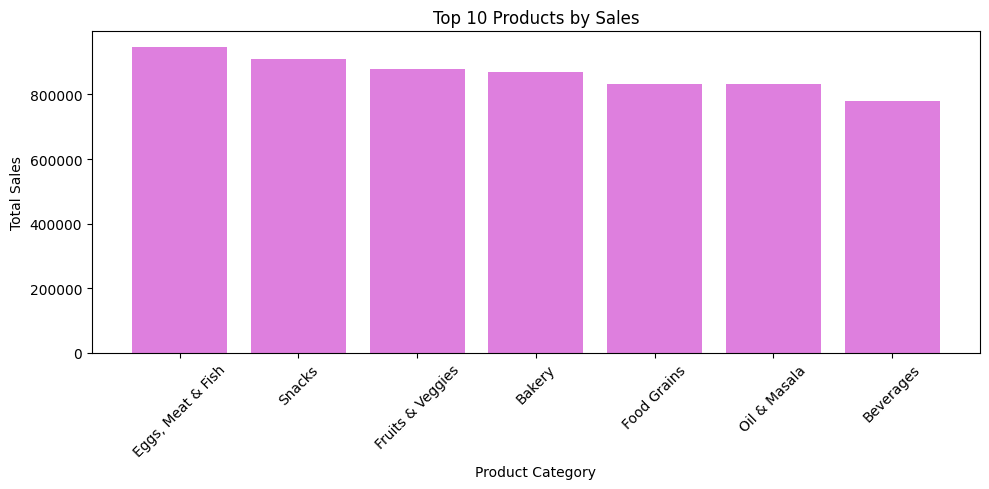

In [30]:
# Plot the top 10 products
plt.figure(figsize=(10, 5))
plt.bar(top_products['Category'], top_products['Sales'], color='m', alpha=.5)
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# Calculate average sales per customer
average_sales_per_customer = sales_df['Sales'].sum() / sales_df['Customer Name'].nunique()
print(f"Average Sales per Customer in Rupees: {average_sales_per_customer:.2f}")


Average Sales per Customer in Rupees: 121070.00


# 5. Visualization:
Present insights through bar charts, line plots, and heatmaps.

### a) Bar Chart: Top 5 Product Categories by Sales

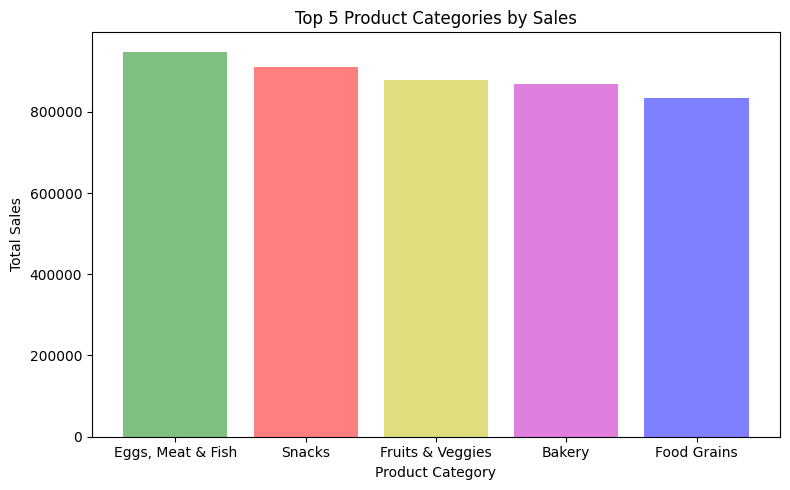

In [32]:
# Group by Category and calculate total sales
top_categories = sales_df.groupby('Category')['Sales'].sum().reset_index()

# Sort categories by sales and take the top 5
top_categories = top_categories.sort_values(by='Sales', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(8, 5))
colors = ['g','r','y','m','b']
plt.bar(top_categories['Category'], top_categories['Sales'], color=colors, alpha=0.5)
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


### b) Line Plot: Monthly Sales Trend

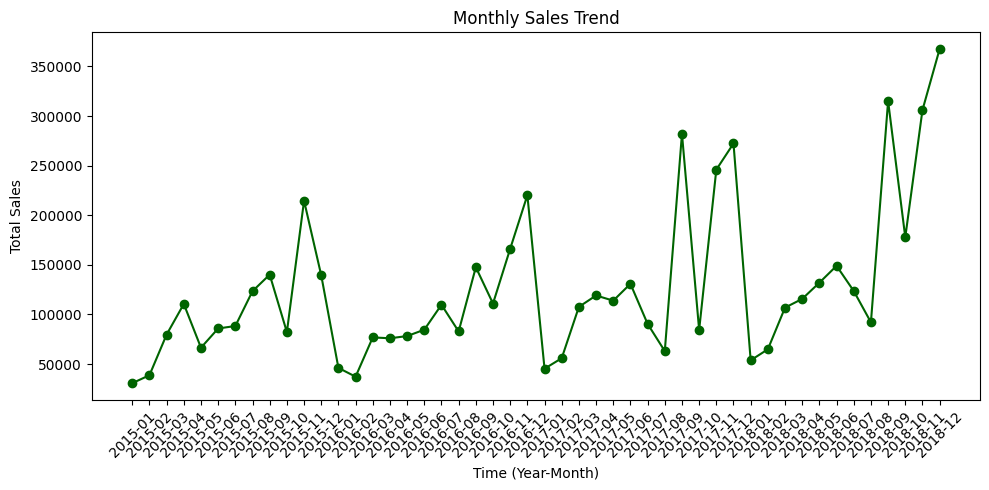

In [33]:
# Ensure 'Order Date' is datetime and group by Month-Year
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Year-Month'] = sales_df['Order Date'].dt.to_period('M')

# Group by Year-Month and calculate total sales
monthly_sales = sales_df.groupby('Year-Month')['Sales'].sum().reset_index()

# Plot the line plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Sales'], marker='o', color='darkgreen')
plt.title('Monthly Sales Trend')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### c) Heatmap: Sales by Month and Region

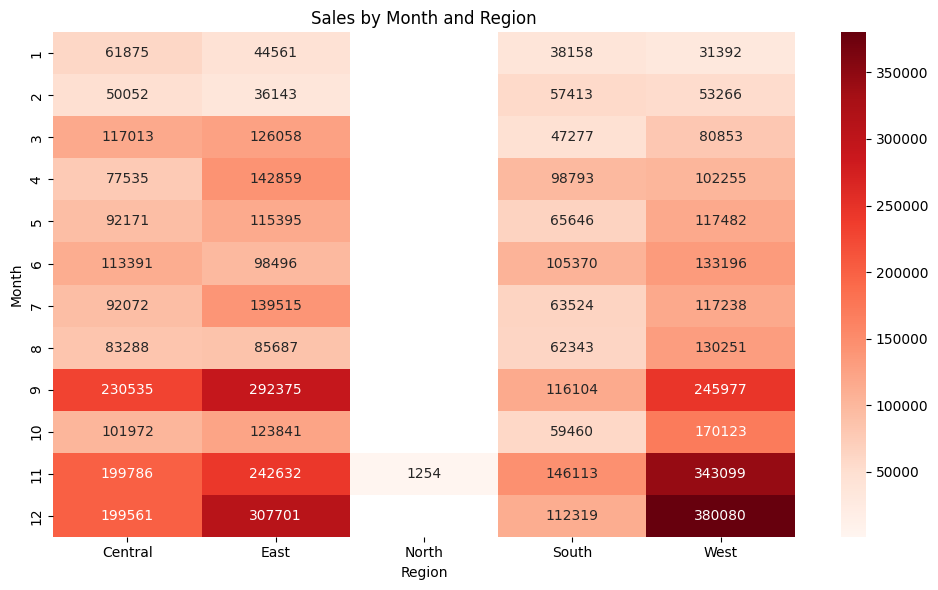

In [34]:
# Extract month and region columns
sales_df['Month'] = sales_df['Order Date'].dt.month

# Group by Month and Region, summing up sales
monthly_region_sales = sales_df.pivot_table(index='Month', columns='Region', values='Sales', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_region_sales, annot=True, fmt='.0f', cmap='Reds')
plt.title('Sales by Month and Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


# 6. Recommendations: 
Provide actionable recommendations based on the EDA.

### a) Use Observations from Bar Charts
If you noticed certain product categories or customers contribute the most to sales:

Recommendation: Focus marketing efforts on the top product categories or high-value customers. Offer them exclusive deals or loyalty rewards.



### b) Use Observations from Line Plots
If you saw a trend in monthly sales (e.g., certain months have higher sales):

Recommendation: Stock up on popular products before peak sales months. Plan promotions and advertising campaigns during high-sales periods to maximize profits.

### c) Use Observations from Heatmaps
If you identified specific regions performing better during certain months:

Recommendation: Allocate more resources to top-performing regions. For low-performing regions, investigate the cause (e.g., pricing, product availability, or customer preferences).

### d) Insights on Customer Behavior
If some customers are consistently high spenders:

Recommendation: Create VIP programs for loyal customers, offering personalized discounts or early access to new products.

### e) Insights on Product Sales
If certain products sell more than others:

Recommendation: Increase inventory for best-selling products and reduce stock for low-demand items to optimize costs.